In [1]:
import sys
import os
import pandas as pd
#import ssbio


from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP

import statistics as stat
import numpy as np
# from sphere_fibo import sphere_fibo

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
if len(sys.argv) !=2:
	print ("Il faut exactement un argument le nom du fichier pdb")
	exit()

if os.path.exists(sys.argv[1])==False:
	print("Le fichier pdb n'a pas été trouvé")
	exit()

In [ ]:
# fichier_pdb=sys.argv[1] ### ../data/1py6.pdb
fichier_pdb='1py6.pdb'

In [ ]:
##Constantes

#d'après l'article aa hydrophobes
HYDROPHOBE=["FHE", "GLY", "ILE", "LEU," "MET", "VAL", "TRP","TYR"]
SEUIL_ACC=0.3
NB_POINTS_SPHERE=256
LARGEUR_ESPACE=15 



def recup_coord_carbones_alpha(fichier_pdb):
	"""
		Recupération des coordonnées des carbones alpha à partir du fichier pdb donné en entrée
		et renvoie d'un dataframe
	"""
	data_pdb=[]
	file=open(fichier_pdb,"r")
	
	for ligne in file:
		if ligne.startswith("ATOM"):
			if str.strip(ligne[12:15])=="CA" and (str.strip(ligne[16:17])=="" or str.strip(ligne[16:17])=="A"):
				data_pdb.append([ligne[17:20],float(str.strip(ligne[30:37])),float(str.strip(ligne[38:46])),float(str.strip(ligne[46:53]))])
	file.close()

	data=pd.DataFrame(data=data_pdb,columns=["type_aa","x","y","z"])

	return (data)

data=recup_coord_carbones_alpha(fichier_pdb) 
print(data)

data["hydrophobe"]=data.type_aa.isin(HYDROPHOBE)
print(data["type_aa"])


from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP


def recup_acc_solvant(fichier_pdb):
	"""
	entrée le fichier pdb
	sortie une liste de l'accesibilité relative (en 0 et 1) des résidues
	utilise Biopython et le programme dssp

	"""
	acces_solvant=[]
	p = PDBParser()
	structure = p.get_structure("structure",fichier_pdb)
	model = structure[0]
	dssp = DSSP(model,fichier_pdb)

	for i in range(len(list(dssp))):
		acces_solvant.append((list(dssp)[i][3]))
	return acces_solvant


acces_solvant=recup_acc_solvant(fichier_pdb)
data["acces_solvant"]=acces_solvant 

print(data)

#on garde que les résidues avec plus d'un certain seuil d'acessibilité au solvant pour la sphère
data=data.loc[data['acces_solvant'] > SEUIL_ACC]
print(data)

import numpy
import statistics as stat 

def recup_centre_gravite(data_frame):
	return(stat.mean(data_frame.x),stat.mean(data_frame.y),stat.mean(data_frame.z))

centre_gravite=recup_centre_gravite(data)

#######
#######



class Sphere:
	def __init__(self,nb_points,centre_gravite):
		self.nb_points = nb_points
		self.coord_points= self.sphere_fibo(nb_points)
		self.centre_sphere=centre_gravite
		self.coord_points+=self.centre_sphere

	def sphere_fibo(self,nb_points):
		"""
		Entrée le nombre de points de la spère
		créé des points uniformement repartis sur la sphère de centre (0,0,0)
		Renvoie un numpy.array des points

		"""
 
		golden_angle = numpy.pi * (3 - numpy.sqrt(5))
		theta = golden_angle * numpy.arange(nb_points)
		z = numpy.linspace(1 - 1.0 / nb_points, 1.0 / nb_points - 1, nb_points)
		radius = numpy.sqrt(1 - z * z)
 
		points = numpy.zeros((nb_points, 3))
		points[:,0] = radius * numpy.cos(theta)
		points[:,1] = radius * numpy.sin(theta)
		points[:,2] = z
  
		return points

	def get_points_sphere(self):
		return self.coord_points
	def get_centre(self):
		return self.centre_sphere

notre_sphere=Sphere(256,centre_gravite)

print(notre_sphere.get_centre())
print(notre_sphere.get_points_sphere())

In [ ]:
points_sphere_coord=notre_sphere.get_points_sphere()
centre_sphere_coord=notre_sphere.get_centre()


In [143]:
centre_sphere_coord=[-0.3737864077669903,-0.07359223300970866,-2.4185436893203884]

points_sphere_coord=pd.DataFrame([[-2.85484419e-01,-7.35922330e-02,-1.42244994e+00]
,[-4.86341295e-01,2.95172636e-02,-1.43026244e+00]
,[-3.56591959e-01,-2.69514108e-01,-1.43807494e+00]
,[-2.32476801e-01,1.10721126e-01,-1.44588744e+00]
,[-6.32592901e-01,-1.19371457e-01,-1.45369994e+00]
,[-1.29110194e-01,-2.29235212e-01,-1.46151244e+00]
,[-4.55462297e-01,2.30238005e-01,-1.46932494e+00]
,[-5.29238720e-01,-3.72906200e-01,-1.47713744e+00]
,[-3.71963655e-02,4.93299106e-02,-1.48494994e+00]
,[-7.23244139e-01,7.06588382e-02,-1.49276244e+00]
,[-2.05666744e-01,-4.32854189e-01,-1.50057494e+00]
,[-2.49803538e-01,3.21684693e-01,-1.50838744e+00]
,[-7.46707251e-01,-2.89707484e-01,-1.51619994e+00]
,[6.27929536e-02,-1.69572981e-01,-1.52401244e+00]
,[-6.39674073e-01,3.04605610e-01,-1.53182494e+00]
,[-4.35085307e-01,-5.46631606e-01,-1.53963744e+00]
,[1.74553468e-03,2.42906486e-01,-1.54744994e+00]
,[-8.78078576e-01,-5.27381686e-02,-1.55526244e+00]
,[-6.71595059e-03,-4.38876365e-01,-1.56307494e+00]
,[-3.98293087e-01,4.56387299e-01,-1.57088744e+00]
,[-7.21581412e-01,-4.90366885e-01,-1.57869994e+00]
,[1.75988300e-01,3.79176383e-04,-1.58651244e+00]
,[-8.38615119e-01,2.49823477e-01,-1.59432494e+00]
,[-2.47040747e-01,-6.36989404e-01,-1.60213744e+00]
,[-8.12614101e-02,4.36902893e-01,-1.60994994e+00]
,[-9.44408337e-01,-2.55636192e-01,-1.61776244e+00]
,[1.79296515e-01,-3.29130572e-01,-1.62557494e+00]
,[-6.12873155e-01,4.97693326e-01,-1.63338744e+00]
,[-5.86698636e-01,-6.65542465e-01,-1.64119994e+00]
,[1.91503673e-01,2.23508390e-01,-1.64901244e+00]
,[-1.00029384e+00,9.15531149e-02,-1.65682494e+00]
,[-1.84657414e-02,-6.26197508e-01,-1.66463744e+00]
,[-2.61008823e-01,5.82628258e-01,-1.67244994e+00]
,[-9.07056198e-01,-4.86586333e-01,-1.68026244e+00]
,[3.06827914e-01,-1.29979738e-01,-1.68807494e+00]
,[-8.43171212e-01,4.33798987e-01,-1.69588744e+00]
,[-3.70375106e-01,-7.72868127e-01,-1.70369994e+00]
,[1.01358893e-01,4.50186112e-01,-1.71151244e+00]
,[-1.08564347e+00,-1.39566985e-01,-1.71932494e+00]
,[2.01700858e-01,-5.10366550e-01,-1.72713744e+00]
,[-5.04419852e-01,6.44484705e-01,-1.73494994e+00]
,[-7.66371180e-01,-6.97448706e-01,-1.74276244e+00]
,[3.43937431e-01,1.23106115e-01,-1.75057494e+00]
,[-1.04205497e+00,2.69352159e-01,-1.75838744e+00]
,[-1.10319544e-01,-7.84248861e-01,-1.76619994e+00]
,[-8.55079014e-02,6.34556742e-01,-1.77401244e+00]
,[-1.07059194e+00,-4.03821377e-01,-1.78182494e+00]
,[3.69184491e-01,-3.02658102e-01,-1.78963744e+00]
,[-7.70060991e-01,6.02580089e-01,-1.79744994e+00]
,[-5.39620363e-01,-8.45852039e-01,-1.80526244e+00]
,[2.75043516e-01,3.87306153e-01,-1.81307494e+00]
,[-1.16938400e+00,2.55615629e-02,-1.82088744e+00]
,[1.49621729e-01,-6.88513588e-01,-1.82869994e+00]
,[-3.44152002e-01,7.39034019e-01,-1.83651244e+00]
,[-9.48444484e-01,-6.56722513e-01,-1.84432494e+00]
,[4.49264604e-01,-3.15090814e-02,-1.85213744e+00]
,[-1.01320287e+00,4.54725488e-01,-1.85994994e+00]
,[-2.58454427e-01,-9.00235172e-01,-1.86776244e+00]
,[1.02454829e-01,6.18057404e-01,-1.87557494e+00]
,[-1.19702735e+00,-2.63018050e-01,-1.88338744e+00]
,[3.65463520e-01,-4.92421689e-01,-1.89119994e+00]
,[-6.37452065e-01,7.39160928e-01,-1.89901244e+00]
,[-7.30325533e-01,-8.55272330e-01,-1.90682494e+00]
,[4.21371332e-01,2.63754265e-01,-1.91463744e+00]
,[-1.19223707e+00,2.16286197e-01,-1.92244994e+00]
,[3.59777167e-02,-8.44095175e-01,-1.93026244e+00]
,[-1.54384346e-01,7.75532325e-01,-1.93807494e+00]
,[-1.11269304e+00,-5.53814110e-01,-1.94588744e+00]
,[4.99534890e-01,-2.19298095e-01,-1.95369994e+00]
,[-9.21823747e-01,6.26962912e-01,-1.96151244e+00]
,[-4.43207500e-01,-9.64312855e-01,-1.96932494e+00]
,[2.81915036e-01,5.38956654e-01,-1.97713744e+00]
,[-1.27485198e+00,-8.23838421e-02,-1.98494994e+00]
,[2.99335614e-01,-6.78255008e-01,-1.99276244e+00]
,[-4.62034935e-01,8.30572753e-01,-2.00057494e+00]
,[-9.21604052e-01,-8.02747689e-01,-2.00838744e+00]
,[5.26108948e-01,9.46571506e-02,-2.01619994e+00]
,[-1.15387328e+00,4.12010038e-01,-2.02401244e+00]
,[-1.25702417e-01,-9.61794317e-01,-2.03182494e+00]
,[4.47200844e-02,7.51806077e-01,-2.03963744e+00]
,[-1.24288648e+00,-4.00631216e-01,-2.04744994e+00]
,[4.90834730e-01,-4.20661422e-01,-2.05526244e+00]
,[-7.78190985e-01,7.69081432e-01,-2.06307494e+00]
,[-6.45659654e-01,-9.70932787e-01,-2.07088744e+00]
,[4.35289563e-01,4.05889048e-01,-2.07869994e+00]
,[-1.29698599e+00,1.19947888e-01,-2.08651244e+00]
,[1.77800102e-01,-8.42119737e-01,-2.09432494e+00]
,[-2.61062360e-01,8.68310296e-01,-2.10213744e+00]
,[-1.09510064e+00,-6.93653263e-01,-2.10994994e+00]
,[5.79431443e-01,-1.03698183e-01,-2.11776244e+00]
,[-1.05806159e+00,5.94192754e-01,-2.12557494e+00]
,[-3.20173510e-01,-1.03057268e+00,-2.13338744e+00]
,[2.34561929e-01,6.70042587e-01,-2.14119994e+00]
,[-1.32687970e+00,-2.11309618e-01,-2.14901244e+00]
,[4.23800524e-01,-6.17061076e-01,-2.15682494e+00]
,[-5.95271623e-01,8.67936267e-01,-2.16463744e+00]
,[-8.47449254e-01,-9.19217075e-01,-2.17244994e+00]
,[5.48541243e-01,2.30601374e-01,-2.18026244e+00]
,[-1.26107942e+00,3.25901521e-01,-2.18807494e+00]
,[1.13396012e-02,-9.69193791e-01,-2.19588744e+00]
,[-5.22195171e-02,8.48599123e-01,-2.20369994e+00]
,[-1.23531575e+00,-5.37170979e-01,-2.21151244e+00]
,[5.76192599e-01,-3.14116197e-01,-2.21932494e+00]
,[-9.12653952e-01,7.46764651e-01,-2.22713744e+00]
,[-5.30823604e-01,-1.04396982e+00,-2.23494994e+00]
,[3.98608250e-01,5.36741646e-01,-2.24276244e+00]
,[-1.35696025e+00,-1.78906266e-03,-2.25057494e+00]
,[3.03564669e-01,-7.91607201e-01,-2.25838744e+00]
,[-3.88249956e-01,9.14629497e-01,-2.26619994e+00]
,[-1.03143501e+00,-8.12922357e-01,-2.27401244e+00]
,[6.11657410e-01,2.74447223e-02,-2.28182494e+00]
,[-1.16951153e+00,5.18188731e-01,-2.28963744e+00]
,[-1.86600153e-01,-1.04842433e+00,-2.29744994e+00]
,[1.47161257e-01,7.72446116e-01,-2.30526244e+00]
,[-1.33023452e+00,-3.45774786e-01,-2.31307494e+00]
,[5.16038462e-01,-5.19321925e-01,-2.32088744e+00]
,[-7.29091941e-01,8.56830294e-01,-2.32869994e+00]
,[-7.40534534e-01,-1.00028889e+00,-2.33651244e+00]
,[5.23167500e-01,3.62257816e-01,-2.34432494e+00]
,[-1.33011258e+00,2.11066268e-01,-2.35213744e+00]
,[1.39346172e-01,-9.29899262e-01,-2.35994994e+00]
,[-1.73641565e-01,9.04857207e-01,-2.36776244e+00]
,[-1.18259688e+00,-6.60089719e-01,-2.37557494e+00]
,[6.19082045e-01,-1.87505678e-01,-2.38338744e+00]
,[-1.02910941e+00,6.81261451e-01,-2.39119994e+00]
,[-4.00472848e-01,-1.07304527e+00,-2.39901244e+00]
,[3.21097007e-01,6.45434686e-01,-2.40682494e+00]
,[-1.37192844e+00,-1.34397015e-01,-2.41463744e+00]
,[4.03285504e-01,-7.02991935e-01,-2.42244994e+00]
,[-5.21612638e-01,9.15351687e-01,-2.43026244e+00]
,[-9.32737713e-01,-9.02562660e-01,-2.43807494e+00]
,[5.98150283e-01,1.60055769e-01,-2.44588744e+00]
,[-1.24807555e+00,4.10538475e-01,-2.45369994e+00]
,[-5.62354752e-02,-1.02085940e+00,-2.46151244e+00]
,[3.17823165e-02,8.39060644e-01,-2.46932494e+00]
,[-1.28893607e+00,-4.72425374e-01,-2.47713744e+00]
,[5.69961643e-01,-3.97520970e-01,-2.48494994e+00]
,[-8.50602830e-01,8.02271727e-01,-2.49276244e+00]
,[-6.13687051e-01,-1.04091770e+00,-2.50057494e+00]
,[4.55966395e-01,4.77260186e-01,-2.50838744e+00]
,[-1.35698898e+00,8.06023212e-02,-2.51619994e+00]
,[2.46542103e-01,-8.50810916e-01,-2.52401244e+00]
,[-3.06252102e-01,9.17672856e-01,-2.53182494e+00]
,[-1.09250656e+00,-7.58265620e-01,-2.53963744e+00]
,[6.17681589e-01,-5.42430776e-02,-2.54744994e+00]
,[-1.11714863e+00,5.81175350e-01,-2.55526244e+00]
,[-2.68061951e-01,-1.05742812e+00,-2.56307494e+00]
,[2.12132059e-01,7.22329203e-01,-2.57088744e+00]
,[-1.34224909e+00,-2.64458716e-01,-2.57869994e+00]
,[4.68146552e-01,-5.86364493e-01,-2.58651244e+00]
,[-6.47849409e-01,8.71918435e-01,-2.59432494e+00]
,[-8.09751259e-01,-9.54630248e-01,-2.60213744e+00]
,[5.41422568e-01,2.81028944e-01,-2.60994994e+00]
,[-1.28672673e+00,2.82570455e-01,-2.61776244e+00]
,[5.80874881e-02,-9.51443587e-01,-2.62557494e+00]
,[-9.97297867e-02,8.63816499e-01,-2.63338744e+00]
,[-1.20757981e+00,-5.78778097e-01,-2.64119994e+00]
,[5.80492866e-01,-2.63947748e-01,-2.64901244e+00]
,[-9.47745808e-01,7.09856969e-01,-2.65682494e+00]
,[-4.79566108e-01,-1.03704878e+00,-2.66463744e+00]
,[3.53501010e-01,5.64047656e-01,-2.67244994e+00]
,[-1.33870092e+00,-5.25379266e-02,-2.68026244e+00]
,[3.21934423e-01,-7.39419111e-01,-2.68807494e+00]
,[-4.36883848e-01,8.85104360e-01,-2.69588744e+00]
,[-9.73418105e-01,-8.21340680e-01,-2.70369994e+00]
,[5.71128786e-01,7.23686813e-02,-2.71151244e+00]
,[-1.16711221e+00,4.55713741e-01,-2.71932494e+00]
,[-1.46949705e-01,-9.97342745e-01,-2.72713744e+00]
,[8.17016983e-02,7.58524147e-01,-2.73494994e+00]
,[-1.26923517e+00,-3.78639318e-01,-2.74276244e+00]
,[4.90060726e-01,-4.52437028e-01,-2.75057494e+00]
,[-7.53728718e-01,7.86727514e-01,-2.75838744e+00]
,[-6.73851181e-01,-9.61903138e-01,-2.76619994e+00]
,[4.44947485e-01,3.77314388e-01,-2.77401244e+00]
,[-1.27915467e+00,1.46260094e-01,-2.78182494e+00]
,[1.43577552e-01,-8.44710876e-01,-2.78963744e+00]
,[-2.34865743e-01,8.41356455e-01,-2.79744994e+00]
,[-1.09174078e+00,-6.52375553e-01,-2.80526244e+00]
,[5.43264741e-01,-1.31577433e-01,-2.81307494e+00]
,[-1.00847008e+00,5.86177534e-01,-2.82088744e+00]
,[-3.51543209e-01,-9.85336216e-01,-2.82869994e+00]
,[2.23350386e-01,6.11046192e-01,-2.83651244e+00]
,[-1.27295058e+00,-1.74657148e-01,-2.84432494e+00]
,[3.54493004e-01,-6.04257436e-01,-2.85213744e+00]
,[-5.51584615e-01,8.05923725e-01,-2.85994994e+00]
,[-8.34783120e-01,-8.38892531e-01,-2.86776244e+00]
,[4.79282416e-01,1.78193427e-01,-2.87557494e+00]
,[-1.16924585e+00,3.15206636e-01,-2.88338744e+00]
,[-5.13859731e-02,-8.93747114e-01,-2.89119994e+00]
,[-5.90277427e-02,7.44989933e-01,-2.89901244e+00]
,[-1.15495206e+00,-4.62644462e-01,-2.90682494e+00]
,[4.60775963e-01,-3.13168192e-01,-2.91463744e+00]
,[-8.24979329e-01,6.62956095e-01,-2.92244994e+00]
,[-5.37743177e-01,-9.16955796e-01,-2.93026244e+00]
,[3.13015023e-01,4.34729590e-01,-2.93807494e+00]
,[-1.21880561e+00,1.50142644e-02,-2.94588744e+00]
,[1.86204101e-01,-7.06062326e-01,-2.95369994e+00]
,[-3.59563262e-01,7.66040210e-01,-2.96151244e+00]
,[-9.47927231e-01,-6.79399405e-01,-2.96932494e+00]
,[4.53588762e-01,-1.50828257e-02,-2.97713744e+00]
,[-1.01922687e+00,4.38843686e-01,-2.98494994e+00]
,[-2.44858394e-01,-8.82078717e-01,-2.99276244e+00]
,[7.42211223e-02,6.05030547e-01,-3.00057494e+00]
,[-1.15705692e+00,-2.69988912e-01,-3.00838744e+00]
,[3.31366593e-01,-4.55123690e-01,-3.01619994e+00]
,[-6.34099153e-01,6.78501423e-01,-3.02401244e+00]
,[-6.87487136e-01,-7.98490820e-01,-3.03182494e+00]
,[3.41594865e-01,2.46520542e-01,-3.03963744e+00]
,[-1.11158351e+00,1.71626794e-01,-3.04744994e+00]
,[1.49166843e-03,-7.47206068e-01,-3.05526244e+00]
,[-1.96992373e-01,6.70264835e-01,-3.06307494e+00]
,[-1.00110903e+00,-4.98932054e-01,-3.07088744e+00]
,[3.69371854e-01,-1.82722997e-01,-3.07869994e+00]
,[-8.43670115e-01,5.03492727e-01,-3.08651244e+00]
,[-4.16711361e-01,-8.09443543e-01,-3.09432494e+00]
,[1.49732742e-01,4.34961879e-01,-3.10213744e+00]
,[-1.09594315e+00,-9.47356395e-02,-3.10994994e+00]
,[1.67271295e-01,-5.40871273e-01,-3.11776244e+00]
,[-4.56202721e-01,6.28771179e-01,-3.12557494e+00]
,[-7.82834840e-01,-6.40758693e-01,-3.13338744e+00]
,[3.03040039e-01,6.66714657e-02,-3.14119994e+00]
,[-9.60506485e-01,2.75943110e-01,-3.14901244e+00]
,[-1.79697448e-01,-7.19556838e-01,-3.15682494e+00]
,[-8.43201332e-02,5.26035478e-01,-3.16463744e+00]
,[-9.84043681e-01,-3.16926216e-01,-3.17244994e+00]
,[2.32082634e-01,-3.03172830e-01,-3.18026244e+00]
,[-6.61269926e-01,4.96648841e-01,-3.18807494e+00]
,[-5.44411644e-01,-6.79086843e-01,-3.19588744e+00]
,[1.52719840e-01,2.52476524e-01,-3.20369994e+00]
,[-9.72411806e-01,3.97576419e-02,-3.21151244e+00]
,[-1.51165272e-02,-5.53285162e-01,-3.21932494e+00]
,[-3.15283446e-01,5.11859346e-01,-3.22713744e+00]
,[-8.04273932e-01,-4.58509532e-01,-3.23494994e+00]
,[1.92443949e-01,-8.04211959e-02,-3.24276244e+00]
,[-7.78277518e-01,3.06027235e-01,-3.25057494e+00]
,[-3.32853891e-01,-6.14874973e-01,-3.25838744e+00]
,[-4.59276196e-02,3.43525852e-01,-3.26619994e+00]
,[-8.84775353e-01,-1.57636959e-01,-3.27401244e+00]
,[4.87785625e-02,-3.49607322e-01,-3.28182494e+00]
,[-4.95553588e-01,4.02189684e-01,-3.28963744e+00]
,[-5.98725453e-01,-4.94218230e-01,-3.29744994e+00]
,[6.23514722e-02,7.97492424e-02,-3.30526244e+00]
,[-7.84886987e-01,1.01935988e-01,-3.31307494e+00]
,[-1.95822692e-01,-4.66153913e-01,-3.32088744e+00]
,[-2.45045704e-01,3.20160775e-01,-3.32869994e+00]
,[-7.19348278e-01,-2.68323760e-01,-3.33651244e+00]
,[-5.55053814e-03,-1.59215953e-01,-3.34432494e+00]
,[-5.76324297e-01,2.22010733e-01,-3.35213744e+00]
,[-4.21160315e-01,-4.07523342e-01,-3.35994994e+00]
,[-1.30787326e-01,1.26245729e-01,-3.36776244e+00]
,[-6.63358019e-01,-5.81174714e-02,-3.37557494e+00]
,[-1.89738186e-01,-2.61216299e-01,-3.38338744e+00]
,[-3.81715739e-01,1.58521845e-01,-3.39119994e+00]
,[-5.01609708e-01,-2.23065422e-01,-3.39901244e+00]
,[-2.22271207e-01,-5.50634773e-02,-3.40682494e+00]
,[-4.45656374e-01,-2.22897069e-02,-3.41463744e+00]],columns=["x","y","z"])

In [3]:
xlist=[points_sphere_coord[i][0]for i in range (len(points_sphere_coord))]
ylist=[points_sphere_coord[i][1]for i in range (len(points_sphere_coord))]
zlist=[points_sphere_coord[i][2]for i in range (len(points_sphere_coord))]


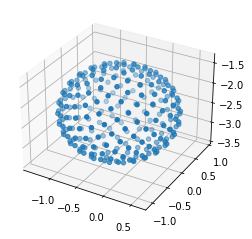

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xlist,ylist,zlist)
plt.show()

In [169]:
def EquationPlan(CentreSphere,PointeVecteur):
    
    vecteur_directeur=[PointeVecteur[i]-CentreSphere[i] for i in range(3)]
    
    #coordonnées centre sphère
    x0,y0,z0=tuple(CentreSphere)

    #coordonnées extrémité du vecteur
    x1,y1,z1=tuple(PointeVecteur)
    
    #paramètres de l'équation du plan
    a,b,c=tuple(vecteur_directeur)
    d=-(a*x1+b*y1+c*z1)
    Parametres=vecteur_directeur+[d]
    
#     print('equation plan: {0}*x+{1}*y+{2}*z+{3}=0'.format(a,b,c,d))
#     print('vecteur directeur:', vecteur_directeur)
    return Parametres

def DeterminerPlanSuivant(CentreSphere,Parametres,epaisseur=15):
    '''
    donne le deuxième plan de la tranche
    '''
    
    a,b,c,d=tuple(Parametres)

    x0,y0,z0=tuple(CentreSphere)
    
    #distance du plan de départ au centre de la sphère
    DistancePlanCentre=np.abs(a*x0+b*y0+c*z0+d)/np.sqrt(a**2+b**2+c**2)

    k=(DistancePlanCentre+epaisseur)/np.sqrt(a**2+b**2+c**2) # k : facteur reliant les vecteurs normaux aux plans

    x1=k*a+x0
    y1=k*b+y0
    z1=k*c+z0

    d1=-(a*x1+b*y1+c*z1)
    
    Parametres=[a,b,c,d1]
    
#     print('equation plan: {0}*x+{1}*y+{2}*z+{3}=0'.format(a,b,c,d1))
#     print('vecteur directeur:', [a,b,c])
    return Parametres
    
def PremierPlanProchaineTranche(CentreSphere,Parametres,Decalage=1):
    
    a,b,c,d=tuple(Parametres)

    x0,y0,z0=tuple(CentreSphere)
    
    #distance du plan de départ au centre de la sphère
    DistancePlanCentre=np.abs(a*x0+b*y0+c*z0+d)/np.sqrt(a**2+b**2+c**2)

    k=(DistancePlanCentre+Decalage)/np.sqrt(a**2+b**2+c**2) # k : facteur reliant les vecteurs normaux aux plans

    x1=k*a+x0
    y1=k*b+y0
    z1=k*c+z0

    d1=-(a*x1+b*y1+c*z1)
    
    Parametres=[a,b,c,d1]
    
    return Parametres

In [125]:
#exemple
E=EquationPlan([8,8,6],[10,9,7])

E1=DeterminerPlanSuivant([8,8,6],E)

In [183]:
def EstEntre2Plans(Coord_Residue,ParametresA,ParametresB,epaisseur=15):

    if ParametresA[0:2]!=ParametresB[0:2] :
        return ('Error : Les deux plans ne sont pas parallèles')
    
    xR,yR,zR=tuple(Coord_Residue)

    a,b,c,d=tuple(ParametresA)
    d1=ParametresB[3]
    
    DistancePlanA=np.abs(a*xR+b*yR+c*zR+d)/np.sqrt(a**2+b**2+c**2)
    DistancePlanB=np.abs(a*xR+b*yR+c*zR+d1)/np.sqrt(a**2+b**2+c**2)
#     print(DistancePlanA,DistancePlanB)
    
    if DistancePlanA<epaisseur and DistancePlanB<epaisseur:
        return True
    else :
        return False

In [127]:
EstEntre2Plans([3,2,1],[0,1]+E[2:],E1)

'Error : Les deux plans ne sont pas parallèles'

In [134]:
data_projet_court=pd.read_csv('data_projet_court.csv').loc[data_projet_court.hydrophobe==True]
print(data_projet_court)
print(centre_sphere_coord)

     Unnamed: 0 type_aa      x       y      z  hydrophobe  acces_solvant
1             1     GLY  11.61 -12.203  16.63        True          0.738
3             5     TRP   9.95 -10.847  10.22        True          0.573
4             6     ILE  11.40 -12.985   7.45        True          0.467
5             7     TRP   8.75 -11.715   5.02        True          0.322
11           21     TYR  17.84  -0.264 -10.16        True          0.572
13           24     VAL  20.29   4.036 -11.70        True          0.746
16           28     GLY  20.84   7.831 -17.11        True          0.798
30           58     GLY   9.85  -3.002  15.27        True          0.679
31           59     TYR   7.97   0.171  14.38        True          0.739
35           67     GLY -12.77  -9.796  19.59        True          0.619
36           68     GLY -11.55 -10.248  23.15        True          0.917
39           75     TRP  -0.17   0.599  10.73        True          0.511
46          101     GLY  -9.98  16.702 -12.68      

In [184]:
def DistanceAuCentre(row): 
    '''
    row est la ligne du dataframe correspondant au Residue
    '''
    x0,y0,z0=tuple(centre_sphere_coord)
    d=np.sqrt((row['x']-x0)**2+(row['y']-y0)**2+(row['z']-z0)**2)
    return d

In [118]:
data_projet_court['DistanceAuCentre']=data_projet_court.apply(DistanceAuCentre,axis=1)

print(data_projet_court)

     Unnamed: 0 type_aa      x       y      z  hydrophobe  acces_solvant  \
1             1     GLY  11.61 -12.203  16.63        True          0.738   
3             5     TRP   9.95 -10.847  10.22        True          0.573   
4             6     ILE  11.40 -12.985   7.45        True          0.467   
5             7     TRP   8.75 -11.715   5.02        True          0.322   
11           21     TYR  17.84  -0.264 -10.16        True          0.572   
13           24     VAL  20.29   4.036 -11.70        True          0.746   
16           28     GLY  20.84   7.831 -17.11        True          0.798   
30           58     GLY   9.85  -3.002  15.27        True          0.679   
31           59     TYR   7.97   0.171  14.38        True          0.739   
35           67     GLY -12.77  -9.796  19.59        True          0.619   
36           68     GLY -11.55 -10.248  23.15        True          0.917   
39           75     TRP  -0.17   0.599  10.73        True          0.511   
46          

In [117]:
DistanceMax=np.abs(data_projet_court['DistanceAuCentre'].max())

print(DistanceMax)

29.70146040283022


### Boucle sur les Vecteurs, puis sur les Plans, puis sur les Residues

In [112]:
Point=points_sphere_coord[1]

In [185]:
def ListeTranches(Point):
    
    x0,y0,z0=tuple(centre_sphere_coord)
    #premier plan correspondant au vecteur:
    E0=EquationPlan(centre_sphere_coord,Point)
    E1=DeterminerPlanSuivant(centre_sphere_coord,E0)
    dTranche0=[E0,E1]
#     print(dTranche0)
    
    Tranches=[dTranche0]
    
    a,b,c,d=tuple(E0)
    
    E2=PremierPlanProchaineTranche(centre_sphere_coord,E0,Decalage=1)
    E1=E2.copy()
    
    d1=E1[3]
    
    DistancePlanBauCentre=np.abs(a*x0+b*y0+c*z0+d1)/np.sqrt(a**2+b**2+c**2)
#     print(DistancePlanBauCentre)
    
    while DistancePlanBauCentre<DistanceMax:
        
        E=DeterminerPlanSuivant(centre_sphere_coord,E1)
        dTranche=[E1,E]
#         print(dTranche)
        
        E2=PremierPlanProchaineTranche(centre_sphere_coord,E1,Decalage=1)
        E1=E2.copy()
        
        d1=E1[3]
        Tranches.append(dTranche)
        
        DistancePlanBauCentre=np.abs(a*x0+b*y0+c*z0+d1)/np.sqrt(a**2+b**2+c**2)

    return Tranches


In [192]:
def ListeResiduesDansTranche(E0,E1):
     
    ListeResidues=[]
    
    for index,row in data_projet_court.iterrows():
        
        Coord_Residue=[row['x'],row['y'],row['z']]
        
        if EstEntre2Plans(Coord_Residue,E0,E1,epaisseur=15)==True:
            
            ListeResidues.append([row['chaine']+str(row['position'])])

    return ListeResidues

In [194]:
#RESULTATS

for index,row in points_sphere_coord.iterrows():
    Point=[row['x'],row['y'],row['z']]
    Tranches=ListeTranches(Point)

    Residues=ListeResiduesDansTranche(Tranches[0][0],Tranches[0][1])

    NombreMaxResiduesHydrophobes=[len(Residues)]
    TrancheMax=[Tranches[0]]
    ResiduesMax=[Residues]
    
    for T in Tranches[1:] :
        
        Residues=ListeResiduesDansTranche(T[0],T[1])
        
        if len(Residues)>NombreMaxResiduesHydrophobes[0]:
            NombreMaxResiduesHydrophobes=[len(Residues)]
            TrancheMax=[T]
            ResiduesMax=[Residues]
            
        else :
            if len(Residues)==NombreMaxResiduesHydrophobes[0]:
                TrancheMax.append(T)
                ResiduesMax.append(Residues)
                                    
    print('NMax',NombreMaxResiduesHydrophobes,'nombreTranchesMemeNombre',len(TrancheMax))
    print(ResiduesMax)


[[0.0883019887669903, 9.708650550166453e-12, 0.9960937493203885, 1.442102335915565], [0.0883019887669903, 9.708650550166453e-12, 0.9960937493203885, -13.557897653999598]]
NMax [19] nombreTranchesMemeNombre 2
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['GLY'], ['ILE'], ['ILE']], [['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['GLY'], ['ILE'], ['ILE']]]
[[-0.11255488723300971, 0.10310949660970865, 0.9882812493203885, 1.355717951252654], [-0.11255488723300971, 0.10310949660970865, 0.9882812493203885, -13.644282038917932]]
NMax [20] nombreTranchesMemeNombre 2
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['TRP'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE']], [['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'],

NMax [18] nombreTranchesMemeNombre 2
[[['TRP'], ['ILE'], ['TRP'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['GLY'], ['ILE'], ['ILE']], [['TRP'], ['ILE'], ['TRP'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['GLY'], ['ILE'], ['ILE']]]
[[-0.5042921682330097, 0.020854064409708654, 0.8632812493203885, 0.9009205584191164], [-0.5042921682330097, 0.020854064409708654, 0.8632812493203885, -14.099079429368825]]
NMax [19] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['GLY'], ['TYR'], ['TRP'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE']]]
[[0.3670704571769903, -0.3652841319902913, 0.8554687493203885, 1.1793124190292115], [0.3670704571769903, -0.3652841319902913, 0.8554687493203885, -13.820687571069401]]
NMax [16] nombreTranchesMemeNombre 1
[[['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'],

NMax [21] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['GLY'], ['TYR'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['GLY']]]
[[-0.5332697902330097, -0.41299409999029135, 0.7382812493203885, 0.5558433002874018], [-0.5332697902330097, -0.41299409999029135, 0.7382812493203885, -14.44415669146277]]
NMax [17] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['TRP'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['VAL'], ['ILE'], ['VAL']]]
[[0.6806143217669902, -0.056387504990291354, 0.7304687493203885, 1.0169252844694878], [0.6806143217669902, -0.056387504990291354, 0.7304687493203885, -13.983074711383484]]
NMax [17] nombreTranchesMemeNombre 1
[[['TRP'], ['ILE'], ['TRP'], ['TYR'], ['VAL'], ['GLY'], ['TYR'], ['GLY'], ['GLY'], ['TRP'], ['VAL'], ['VAL'], ['TYR'], ['GLY'], ['ILE'], ['ILE'], ['VAL']]]
[[-0.4693848042330097, 0.5073912200097087,

NMax [18] nombreTranchesMemeNombre 2
[[['GLY'], ['TYR'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE']], [['GLY'], ['TYR'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE']]]
[[0.5234081367669903, -0.6149213549902913, 0.5898437493203885, 0.5769522901336367], [0.5234081367669903, -0.6149213549902913, 0.5898437493203885, -14.423047702886276]]
NMax [16] nombreTranchesMemeNombre 1
[[['TRP'], ['ILE'], ['TRP'], ['TYR'], ['GLY'], ['TYR'], ['GLY'], ['GLY'], ['TRP'], ['VAL'], ['TYR'], ['ILE'], ['GLY'], ['ILE'], ['ILE'], ['VAL']]]
[[0.02963440576699028, 0.8126262520097086, 0.5820312493203885, 0.47854792495078335], [0.02963440576699028, 0.8126262520097086, 0.5820312493203885, -14.521452064893925]]
NMax [19] nombreTranchesMemeNombre 1
[[['GLY'], ['GLY'], ['TYR'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['

NMax [20] nombreTranchesMemeNombre 3
[[['TYR'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['GLY']], [['TYR'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY']], [['TYR'], ['GLY'], ['GLY'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY']]]
[[-0.06942109223300968, -0.8907206219902913, 0.4492187493203885, -0.005043608182446202], [-0.06942109223300968, -0.8907206219902913, 0.4492187493203885, -15.005043602381718]]
NMax [17] nombreTranchesMemeNombre 4
[[['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['TRP'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['VAL'], ['VAL'], ['ILE'], ['VAL']], [['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['

NMax [17] nombreTranchesMemeNombre 1
[[['VAL'], ['GLY'], ['GLY'], ['TYR'], ['TRP'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TRP'], ['ILE'], ['GLY']]]
[[-0.7213142322330097, -0.6200610299902913, 0.3085937493203885, -0.5689016712084554], [-0.7213142322330097, -0.6200610299902913, 0.3085937493203885, -15.568901706114447]]
NMax [17] nombreTranchesMemeNombre 2
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['TRP'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['ILE'], ['VAL']], [['GLY'], ['TRP'], ['TRP'], ['ILE'], ['GLY'], ['VAL'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['ILE'], ['ILE'], ['VAL']]]
[[0.9532178507669904, -0.030105949990291342, 0.3007812493203885, 0.08153690539223624], [0.9532178507669904, -0.030105949990291342, 0.3007812493203885, -14.918463088520706]]
NMax [12] nombreTranchesMemeNombre 3
[[['TRP'], ['ILE'], ['TRP'], ['TYR'], ['VAL'], ['GLY'], ['GLY'], ['TYR'], ['TR

NMax [19] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['GLY'], ['TRP'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['VAL']]]
[[0.7723946577669902, 0.6103338790097086, 0.17578124932038852, -0.2412389100390419], [0.7723946577669902, 0.6103338790097086, 0.17578124932038852, -15.241238901238995]]
NMax [12] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['TYR'], ['GLY'], ['TYR'], ['TRP'], ['GLY'], ['VAL'], ['ILE'], ['GLY']]]
[[-0.9831738422330096, 0.07180317034970865, 0.16796874932038852, -0.9559731044554145], [-0.9831738422330096, 0.07180317034970865, 0.16796874932038852, -15.955973104993495]]
NMax [22] nombreTranchesMemeNombre 1
[[['GLY'], ['GLY'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['ILE'], ['GLY'], ['ILE']]]
[[0.6773510767669904, -0.7180149679902914, 0.1601562493203885

NMax [17] nombreTranchesMemeNombre 1
[[['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['GLY']]]
[[-0.0266864402330097, -0.9994530369902913, 0.019531249320388522, -1.0362898385643087], [-0.0266864402330097, -0.9994530369902913, 0.019531249320388522, -16.036289905625125]]
NMax [19] nombreTranchesMemeNombre 2
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['GLY'], ['GLY'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['VAL'], ['ILE']], [['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['GLY'], ['GLY'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE'], ['VAL'], ['ILE']]]
[[0.6948834147669902, 0.7190269190097086, 0.011718749320388522, -0.6590049202622796], [0.6948834147669902, 0.7190269190097086, 0.011718749320388522, -15.659004916245738]]
NMax [9] nombreTranchesMemeNombre 2
[[['TYR'], ['GLY'], ['TYR'], ['GLY'], ['V

NMax [21] nombreTranchesMemeNombre 1
[[['GLY'], ['GLY'], ['ILE'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE'], ['VAL']]]
[[0.9914679967669904, 0.019349155409708656, -0.12890625067961148, -0.9397441905066994], [0.9914679967669904, 0.019349155409708656, -0.12890625067961148, -15.939744189700395]]
NMax [10] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['GLY'], ['TYR'], ['VAL'], ['VAL'], ['ILE'], ['GLY']]]
[[-0.7433622222330096, 0.6547675830097086, -0.13671875067961148, -1.5603331558410194], [-0.7433622222330096, 0.6547675830097086, -0.13671875067961148, -16.56033314077328]]
NMax [17] nombreTranchesMemeNombre 1
[[['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['GLY']]]
[[0.10572445676699027, -0.9838358869902913, -0.14453125067961148, -1.3824394548830716], [0.1057244567

NMax [16] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['TYR'], ['VAL'], ['GLY'], ['GLY'], ['TYR'], ['VAL'], ['VAL'], ['ILE'], ['ILE'], ['VAL'], ['ILE'], ['GLY']]]
[[-0.06309744023300973, 0.9586965930097087, -0.2773437506796115, -1.623800320897642], [-0.06309744023300973, 0.9586965930097087, -0.2773437506796115, -16.623800324298262]]
NMax [11] nombreTranchesMemeNombre 4
[[['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['GLY']], [['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['TYR'], ['TYR'], ['GLY'], ['GLY']], [['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['TYR'], ['TYR'], ['GLY'], ['GLY']], [['VAL'], ['GLY'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['GLY']]]
[[-0.5996316972330098, -0.7477484469902914, -0.2851562506796115, -1.9688255061915307], [-0.5996316972330098, -0.7477484469902914, -0.2851562506796115, -16.968825503225926]]
NMax [21] nombreTranchesMemeN

NMax [23] nombreTranchesMemeNombre 1
[[['GLY'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['VAL'], ['VAL'], ['TYR'], ['TYR'], ['VAL'], ['TRP'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY'], ['ILE']]]
[[0.7282794117669903, -0.5306652029902914, -0.4335937506796115, -1.8154973214253116], [0.7282794117669903, -0.5306652029902914, -0.4335937506796115, -16.815497320651417]]
NMax [13] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['TYR'], ['VAL'], ['GLY'], ['VAL'], ['VAL'], ['ILE'], ['VAL'], ['ILE'], ['GLY']]]
[[-0.1777982072330097, 0.8795159580097086, -0.4414062506796115, -2.0692933129072175], [-0.1777982072330097, 0.8795159580097086, -0.4414062506796115, -17.069293320617515]]
NMax [13] nombreTranchesMemeNombre 2
[[['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['ILE']], [['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['GLY'

NMax [10] nombreTranchesMemeNombre 1
[[['GLY'], ['TRP'], ['ILE'], ['TRP'], ['VAL'], ['VAL'], ['ILE'], ['VAL'], ['ILE'], ['GLY']]]
[[-0.2603127452330097, 0.7520936560097087, -0.6054687506796115, -2.5063057411856198], [-0.2603127452330097, 0.7520936560097087, -0.6054687506796115, -17.50630574711306]]
NMax [12] nombreTranchesMemeNombre 2
[[['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['ILE']], [['VAL'], ['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['GLY'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['ILE']]]
[[-0.3137007282330097, -0.7248985869902914, -0.6132812506796115, -2.6538514734015832], [-0.3137007282330097, -0.7248985869902914, -0.6132812506796115, -17.65385147902351]]
NMax [14] nombreTranchesMemeNombre 1
[[['TRP'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY'], ['ILE'], ['ILE'], ['VAL'], ['ILE'], ['GLY']]]
[[0.7153812727669904, 0.3201127750097087, -0.6210937506796115, -2.211184762406658], [0.7153812727669904,

NMax [15] nombreTranchesMemeNombre 1
[[['TYR'], ['VAL'], ['GLY'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['ILE'], ['ILE'], ['VAL'], ['ILE'], ['GLY']]]
[[0.5265062477669903, 0.3260687570097086, -0.7851562506796115, -2.678137689465683], [0.5265062477669903, 0.3260687570097086, -0.7851562506796115, -17.67813769859166]]
NMax [7] nombreTranchesMemeNombre 1
[[['TYR'], ['GLY'], ['VAL'], ['TYR'], ['GLY'], ['VAL'], ['ILE']]]
[[-0.5986253982330096, 0.11334987490970866, -0.7929687506796115, -3.133245935688131], [-0.5986253982330096, 0.11334987490970866, -0.7929687506796115, -18.13324594398358]]
NMax [13] nombreTranchesMemeNombre 2
[[['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['VAL'], ['ILE'], ['TYR'], ['VAL'], ['VAL'], ['VAL'], ['ILE'], ['GLY']], [['GLY'], ['VAL'], ['GLY'], ['GLY'], ['ILE'], ['VAL'], ['ILE'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['ILE'], ['GLY']]]
[[0.3586698805669903, -0.47969292899029137, -0.8007812506796115, -2.837960188718501], [0.3586698805669903, -0

NMax [11] nombreTranchesMemeNombre 1
[[['TYR'], ['VAL'], ['GLY'], ['VAL'], ['GLY'], ['TYR'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['ILE']]]
[[-0.28957161123300973, 0.015474761609708655, -0.9570312506796115, -3.421721002961848], [-0.28957161123300973, 0.015474761609708655, -0.9570312506796115, -18.4217210108844]]
NMax [11] nombreTranchesMemeNombre 2
[[['TYR'], ['VAL'], ['GLY'], ['GLY'], ['VAL'], ['GLY'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['ILE']], [['TYR'], ['VAL'], ['GLY'], ['GLY'], ['VAL'], ['GLY'], ['TYR'], ['TYR'], ['VAL'], ['VAL'], ['ILE']]]
[[0.1840482217669903, -0.18762406599029133, -0.9648437506796115, -3.27852971599861], [0.1840482217669903, -0.18762406599029133, -0.9648437506796115, -18.278529725747262]]
NMax [10] nombreTranchesMemeNombre 1
[[['TYR'], ['VAL'], ['GLY'], ['GLY'], ['TYR'], ['GLY'], ['VAL'], ['VAL'], ['VAL'], ['ILE']]]
[[-0.007929331233009707, 0.23211407800970865, -0.9726562506796115, -3.3382937213732804], [-0.007929331233009707, 0.23211407800970865, -0.972656250

In [ ]:
for Point in points_sphere_coord:
    
    #premier plan correspondant au vecteur:
    def 
    E0=EquationPlan(CentreSphere,PointeVecteur)